In [237]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'survey_results_public.csv'))
df.head()


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [238]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [239]:
fdf = df[
    df.MainBranch == 'I am a developer by profession',
    (df.Country == 'United States of America') &
    (df.US_State.isin(['California', 'Texas', 'Washington', 'New York', 'Colorado', 'Massachusetts', 'Illinois', 'Florida'])) &
    (df.EdLevel.isin([
        "Bachelor's degree (B.A., B.S., B.Eng., etc.)",
        "Master's degree (M.A., M.S., M.Eng., MBA, etc.)",
        'Other doctoral degree (Ph.D., Ed.D., etc.)'
    ])) &
    (df.OpSys.isin(['MacOS', 'Linux-based', 'Windows'])) &
    (df.Currency == 'USD\tUnited States dollar') &
    (df.Gender.isin(['Woman', 'Man']))
][['Employment', 'US_State', 'EdLevel', 'Age1stCode', 'YearsCode', 'YearsCodePro',
   'DevType', 'OrgSize', 'CompTotal', 'OpSys', 'Age', 'Gender']].dropna()

# Employment
fdf.Employment = fdf.Employment.replace(
    ['Employed full-time', 'Independent contractor, freelancer, or self-employed',
        'Employed part-time'],
    ['Full-time', 'Freelance', 'Part-time'])

# Ed Level
fdf.EdLevel = fdf.EdLevel.replace([
    "Bachelor's degree (B.A., B.S., B.Eng., etc.)",
    "Master's degree (M.A., M.S., M.Eng., MBA, etc.)",
    'Other doctoral degree (Ph.D., Ed.D., etc.)'],
    ['BSc', 'MSc', 'PhD'])

# Dev Type
fdf = fdf.assign(DevType=fdf['DevType'].str.split(';')).explode('DevType')
fdf = fdf[fdf.DevType.str.contains('Developer')]
fdf.DevType = fdf.DevType.replace(['Developer, front-end',
                                   'Developer, desktop or enterprise applications',
                                   'Developer, full-stack', 'Developer, back-end',
                                   'Developer, QA or test',
                                   'Developer, embedded applications or devices', 'Developer, mobile',
                                   'Developer, game or graphics'],
                                  ['FE', 'Desktop', 'Full-stack', 'BE', 'QA', 'Embedded', 'Mobile', 'Game'])

# Org size
fdf.OrgSize = fdf.OrgSize.replace([
    '1,000 to 4,999 employees',
    '10,000 or more employees',
    '2 to 9 employees',
    '500 to 999 employees',
    '20 to 99 employees',
    '100 to 499 employees',
    '10 to 19 employees',
    '5,000 to 9,999 employees',
    'Just me - I am a freelancer, sole proprietor, etc.'
], [
    '1,000-4,999',
    '>= 10,000',
    '2-9',
    '500-999',
    '20-99',
    '100-499',
    '10-19',
    '5,000-9,999',
    '1'])
fdf = fdf[fdf.OrgSize != "I don't know"]
fdf.OrgSize = fdf.OrgSize.replace(['2-9', '10-19'], '2-19')

# Compensation
fdf.CompTotal = pd.cut(fdf.CompTotal, bins=[0, 50_000, 100_000, 150_000, 200_000, float(
    'inf')], labels=['< 50k', '50k-100k', '100k-150k', '150k-200k', '> 200k'], right=False)

# Age
fdf.Age = fdf.Age.replace([
    '35-44 years old',
    '25-34 years old',
    '18-24 years old',
    '65 years or older',
    '45-54 years old',
    '55-64 years old',
    'Under 18 years old'
], [
    '35-44',
    '25-34',
    '18-24',
    '>= 65',
    '45-54',
    '55-64',
    '< 18'
])

# Age1stCode
fdf.Age1stCode = fdf.Age1stCode.replace(
    ['5 - 10 years', 'Younger than 5 years'], '<= 10')
fdf.Age1stCode = fdf.Age1stCode.replace(
    ['11 - 17 years', '18 - 24 years'], '11-24')
fdf.Age1stCode = fdf.Age1stCode.replace('25 - 34 years', '25-34')
fdf.Age1stCode = fdf.Age1stCode.replace(
    ['35 - 44 years', '45 - 54 years'], '35-54')
fdf.Age1stCode = fdf.Age1stCode.replace('55 - 64 years', '55-64')
fdf.Age1stCode = fdf.Age1stCode.replace('Older than 64 years', '> 64')


def years_to_int(s):
    try:
        return int(str(s))
    except ValueError:
        if str(s) == 'Less than 1 year':
            return 0
        if str(s) == 'More than 50 years':
            return 50

    return 0


fdf.YearsCode = pd.cut(fdf.YearsCode.apply(years_to_int), bins=[0, 10, 20, 30, 40, float('inf')], labels=[
                       '< 10', '10-20', '20-30', '30-40', '> 40'], right=False)
fdf.YearsCodePro = pd.cut(fdf.YearsCodePro.apply(years_to_int), bins=[
                          0, 10, 20, 30, 40, float('inf')], labels=['< 10', '10-20', '20-30', '30-40', '> 40'], right=False)


In [240]:
fdf.describe()

,MainBranch,Employment,US_State,EdLevel,Age1stCode,YearsCode,YearsCodePro,DevType,OrgSize,CompTotal,OpSys,Age,Gender
count,5386,5386,5386,5386,5386,5386,5386,5386,5386,5386,5386,5386,5386
unique,2,3,8,3,6,5,5,8,8,5,3,6,2
top,Yes,Full-time,California,BSc,11-24,10-20,< 10,Full-stack,">= 10,000",100k-150k,MacOS,25-34,Man
freq,5221,5053,1422,4041,4105,1951,2778,1686,1299,1749,2509,2445,5093


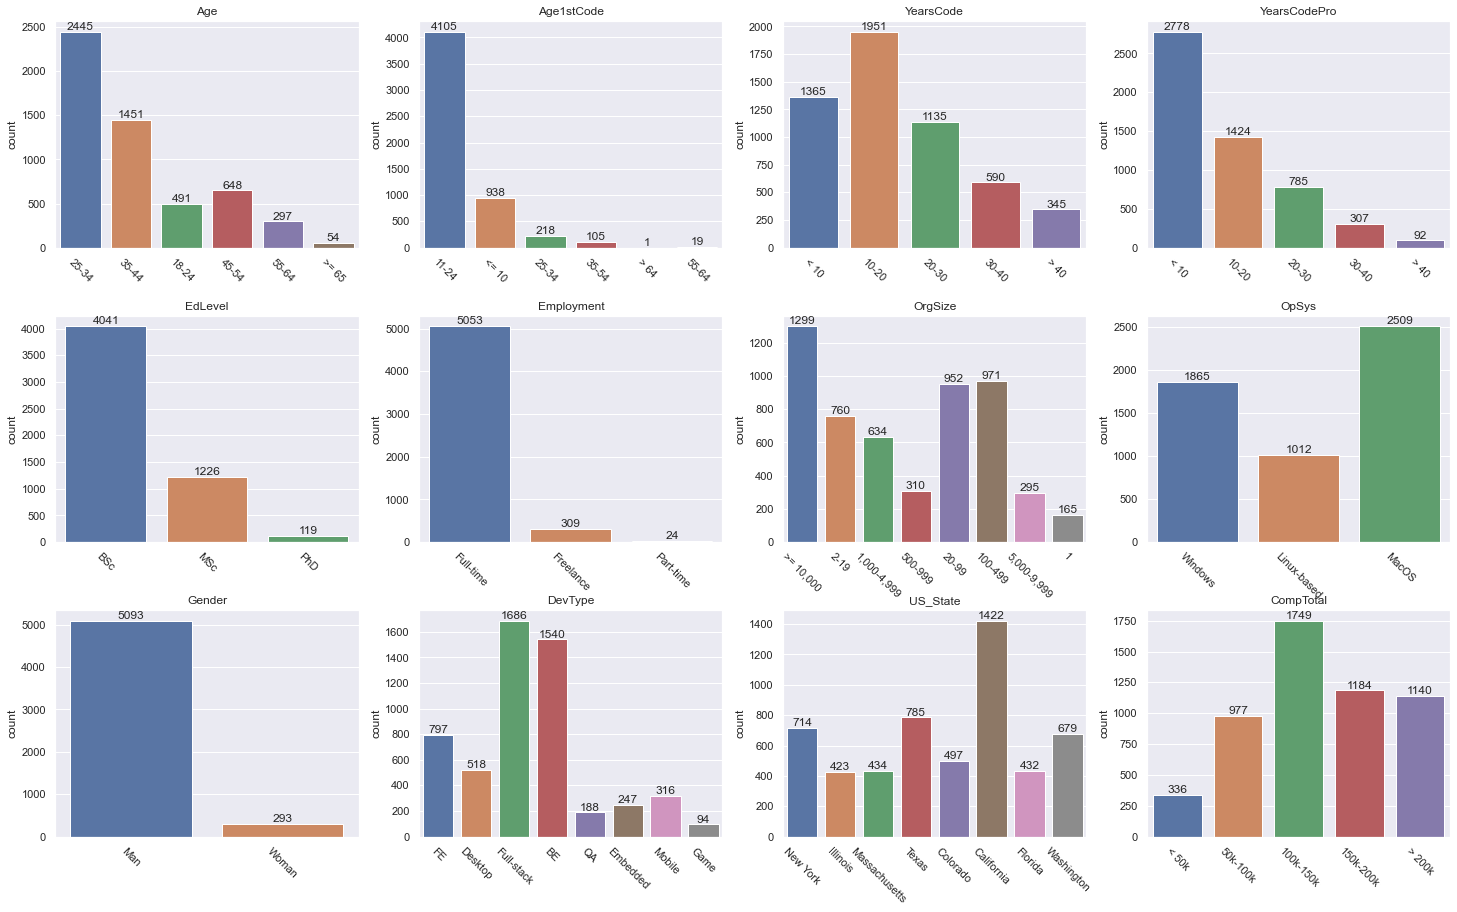

In [244]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(25, 15))
plt.subplots_adjust(hspace=0.3)

row = 0
col = 0
for columnName in ['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'EdLevel', 'Employment',
                   'OrgSize', 'OpSys', 'Gender', 'DevType', 'US_State', 'CompTotal']:
    ax = sns.countplot(x=columnName, data=fdf, ax=axs[row][col])
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=-45)
    ax.set_xlabel(None)
    ax.set_title(columnName)
    col += 1

    if col == 4:
        row += 1
        col = 0
